# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/raffy/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


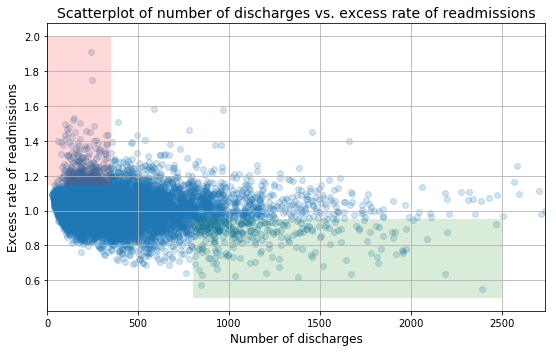

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

Clean the data for analysis

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
#retain only the part of the data that I'm concerned with
df = clean_hospital_read_df[['Number of Discharges', 
                             'Excess Readmission Ratio', 
                             'Predicted Readmission Rate', 
                             'Expected Readmission Rate', 
                             'Number of Readmissions']]
#drop null values
df = df.dropna(subset=['Number of Discharges', 
                             'Excess Readmission Ratio', 
                             'Predicted Readmission Rate', 
                             'Expected Readmission Rate', 
                             'Number of Readmissions'])

In [7]:
#check if successful
df.isnull().sum()

Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
dtype: int64

In [8]:
#check shape of dataframe
df.shape

(11497, 5)

Confirm statistics

In [9]:
# dataframe for < 100 discharges
df100 = df[(df['Number of Discharges'] < 100)]

#percentage with excess readmission rate greater than 1
percentage = round((float(len(df100[(df100["Excess Readmission Ratio"]>1)]))/ len(df100))*100,2)

#mean 
mean_100 = round(np.mean(df100["Excess Readmission Ratio"]),4)

mean_100, percentage

(1.0226, 63.22)

In [10]:
# dataframe for < 100 discharges
df1000 = df[(df['Number of Discharges'] > 1000)]

#percentage with excess readmission rate greater than 1
percentage = round((float(len(df1000[(df1000["Excess Readmission Ratio"]>1)]))/ len(df1000))*100,2)

#mean 
mean_1000 = round(np.mean(df1000["Excess Readmission Ratio"]),4)

mean_1000, percentage

(0.9783, 44.49)

We can confirm the statistics provided.

Standard deviation for dfs

In [11]:
std100 = np.std(df100["Excess Readmission Ratio"])
std1000 = np.std(df1000["Excess Readmission Ratio"])

# A

## Do you agree with the above analysis and recommendations? Why or why not?

No, I don’t agree with the analysis and recommendations. Just from the plot provided, there isn’t anything that we could draw out. There is no clear correlation between the number of discharges and the excess readmission ratio just from looking at the scatterplot. If we are to put a line through the data, it seems that it would most likely be horizontal.

The statistics provided and conclusions are interesting as intuitively it makes sense for smaller number of discharges to come from smaller capacity hospitals and thus also, discharge patients faster in order to increase turnover. This may be dependent on the business model of the hospital. That may be something that isn’t covered by this analysis though.

The statistics can also be a good starting point for analysis.

# B

## Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

$H_0 :$ There is no difference between excess readmission rate in number of discharges less than 100 and greater than 1000.

$H_1 :$ There is a difference.

### 2. Compute and report the observed significance value (or p-value).

In [12]:
# compute for p-value using Welch's t-test
tstat, pv = stats.ttest_ind(df100["Excess Readmission Ratio"], df1000["Excess Readmission Ratio"], equal_var=False)
pv

1.2752435451140344e-13

We can reject the null hypothesis and say that there is a difference between the excess readmission rates.

### 3. Report statistical significance for $\alpha$ = .01. 

$\alpha$ = .01

In [13]:
# 99% confidence interval for df 100
stats.norm.interval(.99, loc=df100["Excess Readmission Ratio"].mean(), 
                    scale=std100/np.sqrt(len(df100["Excess Readmission Ratio"])))

(1.0182872946888624, 1.0269494056478388)

In [14]:
# 99% confidence interval for df 1000
stats.norm.interval(.99, loc=df1000["Excess Readmission Ratio"].mean(), 
                    scale=std1000/np.sqrt(len(df1000["Excess Readmission Ratio"])))

(0.96398499050101172, 0.99268585183160252)

The chances of us encountering a type I error are outside the confidence intervals.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance doesn't immediately mean that the results would have a practical consequence. It is possible that a small difference in the hypothesized value is statistically significant but it might be meaningless to the situation. This is one scenario where the analyst domain knowldge can be used to determine whether the difference is practically significant.

In terms of making recommendations to the client, it is best to take statistical significance with a grain of salt. Other factors might be better focused on. It is possible that the dynamics of how hospitals with lower capacities operate are much different from how higher capacities function. These are considerations which can be looked at to make a better recommendation.

###    5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

Advantages:
- can be easily spot trends
- retains exact data values and sample size
- outliers are isolated

Disadvantages:
- hard to visualize results in a large data set
- flat trend lines give inconclusive results
- unable to measure precise extent of a correlation
- not a quantitative measure of the relationship between variables

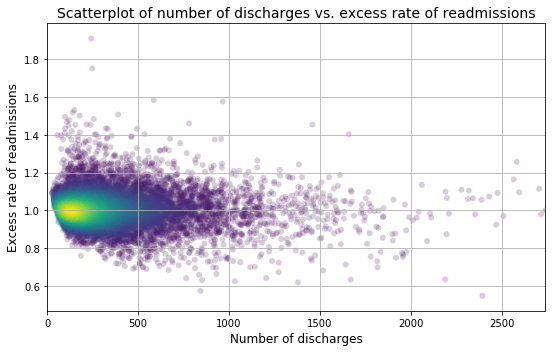

In [15]:
# generate a scatterplot that includes kde
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, c=z, alpha=0.2, edgecolor='')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

This graph shows that there is a higher concentration of lower number of discharges with greater incidence of excess rate of readmissions.